In [1]:
pwd

'/home/jovyan/UP221_ranierigina'

In [4]:
#The dataset is from CalFIRE of the perimeter of current and most recent fires. I will analyze it and clip out the most recent 2025 LA fires

In [12]:
#I am running the following commands to describe this dataset: .shape, .info, .head, .plot, and .valuecounts

In [13]:
#I will then filter to the 2025 fires

In [5]:
import pandas as pd

In [9]:
import geopandas as gpd

In [7]:
#imported the relevant packages

In [30]:
firedata = gpd.read_file('Data Collection/CalFIREdata.geojson')

In [ ]:
#imported and read the file

In [33]:
type(firedata)

geopandas.geodataframe.GeoDataFrame

In [34]:
#the data type is a GeoJSON

In [35]:
firedata.head()

,OBJECTID,GlobalID,type,source,poly_DateCurrent,mission,incident_name,incident_number,area_acres,description,FireDiscoveryDate,CreationDate,EditDate,displayStatus,geometry
0,1,4c658021-4a6a-43b1-989a-ed8ad74c8737,Heat Perimeter,NIFC,2024-02-11 10:33:27+00:00,2024-CACDD-002185,IRIS,2024-CACDD-002185,10.411850,Wildfire Daily Fire Perimeter,2024-02-11 04:33:27+00:00,2024-02-11 16:01:16+00:00,2024-02-12 17:16:33+00:00,Inactive,"POLYGON ((-115.5047 33.28874, -115.5047 33.288..."
1,2,8633c474-5701-47cb-9650-53f66778e374,Heat Perimeter,FIRIS,2024-02-21 21:08:25+00:00,CA-RVC-PALMAS-N40Y,None,None,284.111112,FIRIS Perimeter,NaT,2024-02-21 21:05:09+00:00,2024-02-21 21:10:37+00:00,Inactive,"POLYGON ((-115.82753 33.50886, -115.82766 33.5..."
2,4,d38f2804-59d5-4529-8475-67434070fc20,Heat Perimeter,FIRIS,2024-04-04 12:35:09.631000+00:00,CA-BDU-CARTAGO-N43U,None,None,101.343848,FIRIS Perimeter,NaT,2024-04-04 12:29:07+00:00,2024-04-04 12:38:54.561000+00:00,Inactive,"POLYGON ((-118.01999 36.3042, -118.02038 36.30..."
3,6,fa0e7fb1-08cf-4aa5-942c-81b300d02ccf,Heat Perimeter,FIRIS,2024-04-12 20:09:21.437000+00:00,CA-LNU-MARSH-N57B,None,None,304.138125,FIRIS Perimeter,NaT,2024-04-12 20:08:23+00:00,2024-04-12 20:11:46.323000+00:00,Inactive,"POLYGON ((-121.83041 38.05712, -121.83055 38.0..."
4,7,7485825a-c647-43d7-b43f-7b2b7a56c570,Heat Perimeter,FIRIS,2024-04-12 20:48:39.485000+00:00,CA-KRN-GARDNER-N43U,None,None,59.086175,FIRIS Perimeter,NaT,2024-04-12 20:44:23+00:00,2024-04-12 20:51:02.107000+00:00,Inactive,"MULTIPOLYGON (((-119.3953 35.15304, -119.39553..."


In [44]:
#the first five rows of data. Data collection began in spring 2024

In [37]:
firedata.dtypes

OBJECTID                           int32
GlobalID                          object
type                              object
source                            object
poly_DateCurrent     datetime64[ms, UTC]
mission                           object
incident_name                     object
incident_number                   object
area_acres                       float64
description                       object
FireDiscoveryDate    datetime64[ms, UTC]
CreationDate         datetime64[ms, UTC]
EditDate             datetime64[ms, UTC]
displayStatus                     object
geometry                        geometry
dtype: object

In [48]:
#These are the types of data within the dataframe. I'm going to eventually query only 'active' fires which are all after 2025

In [40]:
firedata.shape

(1213, 15)

In [45]:
#the amount of rows and columns

In [41]:
firedata.info

<bound method DataFrame.info of       OBJECTID                              GlobalID            type  \
0            1  4c658021-4a6a-43b1-989a-ed8ad74c8737  Heat Perimeter   
1            2  8633c474-5701-47cb-9650-53f66778e374  Heat Perimeter   
2            4  d38f2804-59d5-4529-8475-67434070fc20  Heat Perimeter   
3            6  fa0e7fb1-08cf-4aa5-942c-81b300d02ccf  Heat Perimeter   
4            7  7485825a-c647-43d7-b43f-7b2b7a56c570  Heat Perimeter   
...        ...                                   ...             ...   
1208      1295  e4786a41-cab7-485c-8eab-6dd8ebf7c6ea  Heat Perimeter   
1209      1296  d974f2ea-0988-4c23-9830-62be00ac4ab2  Heat Perimeter   
1210      1297  990649b3-d3e3-41f2-85ca-f2deb7432310  Heat Perimeter   
1211      1298  11f9412a-a268-4428-a2b3-f21ea052fdc5  Heat Perimeter   
1212      1299  2ed5d582-5ab8-42c6-9c9f-0ab5199e05d1  Heat Perimeter   

                          source                 poly_DateCurrent  \
0                           NIFC  

In [ ]:
#this command gives us more information about data types in geopandas

<Axes: >

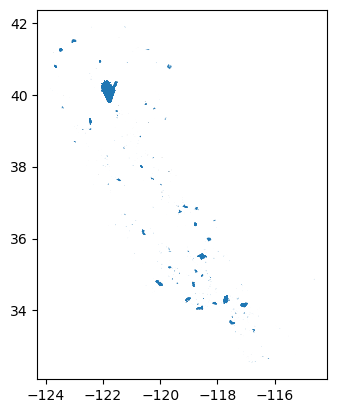

In [42]:
firedata.plot()

In [47]:
#the x and y coordinates are pulled from multi-polygon latitude and longitude points

In [49]:
#now I am going to trim the data to only include active wildfires

In [53]:
firedata.loc[firedata['displayStatus'] == 'Active']

,OBJECTID,GlobalID,type,source,poly_DateCurrent,mission,incident_name,incident_number,area_acres,description,FireDiscoveryDate,CreationDate,EditDate,displayStatus,geometry
1172,1259,e1234381-5143-4263-8ec2-830da03e1c17,Heat Perimeter,NIFC,2024-12-29 17:53:07.575000+00:00,2024-CACDD-019350,PINNACLE,2024-CACDD-019350,1.200000,Wildfire Daily Fire Perimeter,2024-12-28 05:28:07+00:00,2024-12-28 06:03:57.508000+00:00,2024-12-29 20:09:56.995000+00:00,Active,"POLYGON ((-117.65323 35.51455, -117.65326 35.5..."
1173,1260,dbc83159-9e70-4e54-81d6-6d808682ce0a,Heat Perimeter,FIRIS,2025-01-01 05:39:02.359000+00:00,CA-SBC-OAK-N40Y,None,None,41.998143,FIRIS Perimeter,NaT,2025-01-01 05:37:18+00:00,NaT,Active,"POLYGON ((-120.24304 34.88387, -120.24302 34.8..."
1174,1261,15be993e-6854-4d0e-8fc5-81f2079a325e,Heat Perimeter,FIRIS,2025-01-02 05:16:55.340000+00:00,CA-SDU-BORDER1-N40Y,None,None,16.911501,FIRIS Perimeter,NaT,2025-01-02 05:13:35+00:00,NaT,Active,"MULTIPOLYGON (((-116.82928 32.59686, -116.8293..."
1175,1262,7ee0ab36-f6af-4ca9-96ed-170ebc0b0ba0,Heat Perimeter,FIRIS,2025-01-07 22:11:19.142000+00:00,CA-LFD-PALISADES-N57B,None,None,771.572356,FIRIS Perimeter,NaT,2025-01-07 22:09:29+00:00,NaT,Active,"MULTIPOLYGON (((-118.55013 34.06195, -118.5501..."
1176,1263,f4b2a2f8-b549-425a-8420-e11c78a5a9da,Heat Perimeter,FIRIS,2025-01-07 23:17:35.698000+00:00,CA-LFD-PALISADES-N57B,None,None,1261.520779,FIRIS Perimeter,NaT,2025-01-07 23:13:25+00:00,NaT,Active,"MULTIPOLYGON (((-118.55013 34.06195, -118.5501..."
1177,1264,0bc1ddb3-63bf-4fd8-a01b-d522f57e4083,Heat Perimeter,FIRIS,2025-01-07 23:17:39.454000+00:00,CA-LFD-PALISADES-N57B,None,None,1261.520779,FIRIS Perimeter,NaT,2025-01-07 23:13:25+00:00,NaT,Active,"MULTIPOLYGON (((-118.55013 34.06195, -118.5501..."
1178,1265,80a365ca-2de5-434e-8bd8-195405caefec,Heat Perimeter,FIRIS,2025-01-08 02:17:53.772000+00:00,CA-LFD-PALISADES-N57B,None,None,2920.451532,FIRIS Perimeter,NaT,2025-01-08 02:15:44+00:00,NaT,Active,"MULTIPOLYGON (((-118.55132 34.06361, -118.5514..."
1179,1266,34c2af2a-54f0-4830-a99e-bd47edb2b503,Heat Perimeter,FIRIS,2025-01-08 21:07:37.385000+00:00,CA-LFD-PALISADES-N57B,None,None,15832.376531,FIRIS Perimeter,NaT,2025-01-08 21:05:56+00:00,NaT,Active,"MULTIPOLYGON (((-118.54532 34.06088, -118.5455..."
1180,1267,98243b68-f4d5-4467-b19f-cf88106e18e7,Heat Perimeter,FIRIS,2025-01-08 21:07:37.385000+00:00,CA-LFD-PALISADES-N57B,None,None,15832.376531,FIRIS Perimeter,NaT,2025-01-08 21:05:56+00:00,NaT,Active,"MULTIPOLYGON (((-118.54532 34.06088, -118.5455..."
1181,1268,0d7d92b4-e5b5-464e-a02b-e70dbd80d06d,Heat Perimeter,FIRIS,2025-01-09 01:30:54.185000+00:00,CA-LAC-LIDIA-N57B,None,None,347.704224,FIRIS Perimeter,NaT,2025-01-09 01:26:26+00:00,NaT,Active,"POLYGON ((-118.25563 34.43419, -118.25547 34.4..."


In [54]:
activefire = firedata.loc[firedata['displayStatus'] == 'Active']

In [55]:
#renamed the queried rows as activefire

<Axes: >

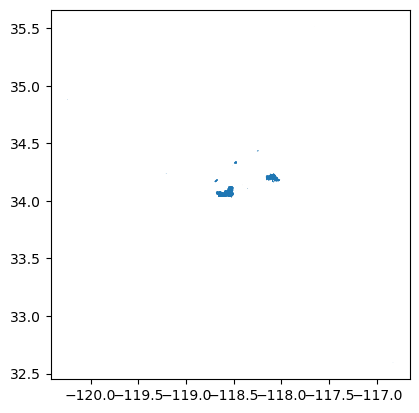

In [56]:
activefire.plot()

In [57]:
#the plot has been trimmed down to active fires only, the scale has also changed to mostly SoCal, the bigger blobs are Palisades and Eaton

In [58]:
#this data will be used to compare with rental prices in the region. we are trying to isolate the effects of these fires only, not all fires since spring 2024.

In [59]:
activefire.geometry

1172    POLYGON ((-117.65323 35.51455, -117.65326 35.5...
1173    POLYGON ((-120.24304 34.88387, -120.24302 34.8...
1174    MULTIPOLYGON (((-116.82928 32.59686, -116.8293...
1175    MULTIPOLYGON (((-118.55013 34.06195, -118.5501...
1176    MULTIPOLYGON (((-118.55013 34.06195, -118.5501...
1177    MULTIPOLYGON (((-118.55013 34.06195, -118.5501...
1178    MULTIPOLYGON (((-118.55132 34.06361, -118.5514...
1179    MULTIPOLYGON (((-118.54532 34.06088, -118.5455...
1180    MULTIPOLYGON (((-118.54532 34.06088, -118.5455...
1181    POLYGON ((-118.25563 34.43419, -118.25547 34.4...
1182    MULTIPOLYGON (((-118.354 34.10682, -118.35456 ...
1183    MULTIPOLYGON (((-118.0668 34.20919, -118.06685...
1184    MULTIPOLYGON (((-118.48285 34.32611, -118.4828...
1185    MULTIPOLYGON (((-118.35439 34.1058, -118.35442...
1186    MULTIPOLYGON (((-118.40509 34.13888, -118.4051...
1187    MULTIPOLYGON (((-118.35439 34.1058, -118.35442...
1188    MULTIPOLYGON (((-118.68341 34.17081, -118.6837...
1189    MULTIP

In [ ]:
#this describes the lat/long coordinates